In [1]:
# load modules
import sys
sys.path.append('../')
from imperial_floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
from imperial_floris.visualization_manager import VisualizationManager
import imperial_floris.optimisation_manager as optimisation_manager  # MODIFIED modules used for optimizing FLORIS
import imp
import time
import copy

# See https://v2.overleaf.com/16702532wdkvyywcgsxh#!#%2F64036805%2F for more information

## Specify Case Study, Initialise File Names

In [2]:
# specify case study
case = 'case2'

# specify case file names
init_name = '{}_init'.format(case)
loc_name = '{}_loc'.format(case)
yaw_name = '{}_yaw'.format(case)
loc_yaw_name = '{}_loc_yaw'.format(case)
direction_name = '{}'

## No Optimisation 

Time to compute wake =  0.036299705505371094 s
Initial Power Output =  5.102218332510335  MW


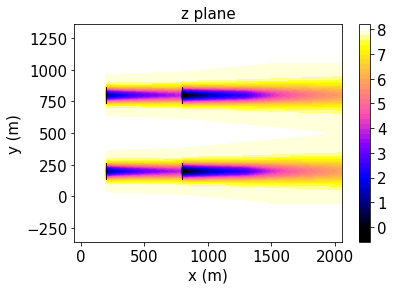

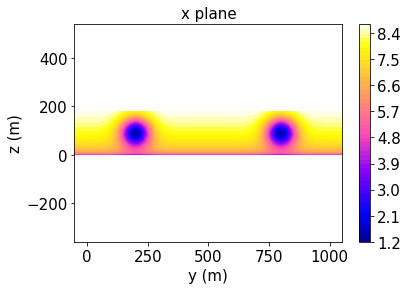

In [3]:
# start timer
t1 = time.time()
init_floris = Floris('{}.json'.format(case))
num_turbines = len(init_floris.farm.flow_field.turbine_map.turbine_map)

# determine initial power production
init_floris.farm.flow_field.calculate_wake()

# end timer and print time difference
t2 = time.time()
print('Time to compute wake = ', t2-t1, 's')

# calculate initial power and print
init_power = optimisation_manager.calc_power(init_floris)[1]
print('Initial Power Output = ', init_power/10**6, ' MW')

# plot initial wake_field
ff_viz = init_floris.farm.flow_field
visualization_manager = VisualizationManager(ff_viz, init_name, plot_wakes=True)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Optimise Power Output for Turbine Locations Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5316691.15127381
            Iterations: 2
            Function evaluations: 20
            Gradient evaluations: 2
basinhopping step 0: f -5.31669e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6845040.563451367
            Iterations: 28
            Function evaluations: 298
            Gradient evaluations: 28
basinhopping step 1: f -6.84504e+06 trial_f -6.84504e+06 accepted 1  lowest_f -6.84504e+06
found new global minimum on step 1 with function value -6.84504e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6845040.564853996
            Iterations: 4
            Function evaluations: 51
            Gradient evaluations: 4
basinhopping step 2: f -6.84504e+06 trial_f -6.84504e+06 accepted 1  lowest_f -6.84504e+06
found new global minimum on step 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6845040.564613325
            Iterations: 5
            Function evaluations: 64
            Gradient evaluations: 5
basinhopping step 27: f -6.84504e+06 trial_f -6.84504e+06 accepted 1  lowest_f -6.84504e+06
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6845040.564803113
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3
basinhopping step 28: f -6.84504e+06 trial_f -6.84504e+06 accepted 1  lowest_f -6.84504e+06
Optimised  Parameters:
Turbine (794.0803714361982, 1000.0) parameter layout_x = 794.0803714361982
Turbine (794.0807492344126, 0.0) parameter layout_x = 794.0807492344126
Turbine (799.6430385914779, 199.66758255483182) parameter layout_x = 799.6430385914779
Turbine (800.3631436543018, 800.7109852793691) parameter layout_x = 800.3631436543018
Turbine (794.0803714361982, 1000.0) parameter layout_y 

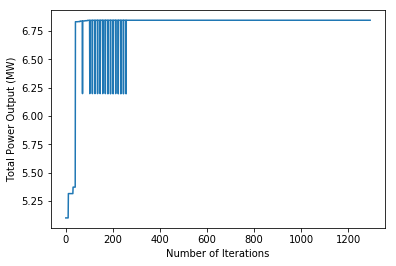

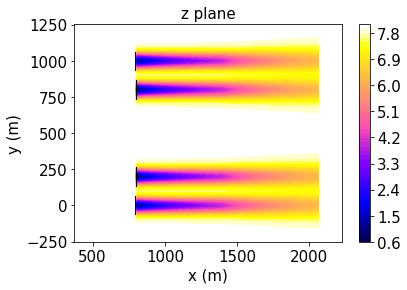

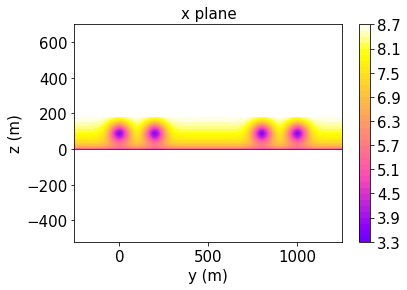

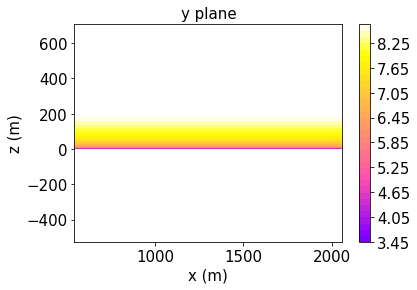

([1712005.1679717556, 1712005.1679717556, 1710515.1144209472, 1710515.114438655], 6845040.564803113)


'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_subopt_power = loc_data[2][iteration - 1]\nloc_subopt_params = loc_data[3][iteration - 1]\noptimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [4]:
imp.reload(optimisation_manager)
loc_floris = Floris('{}.json'.format(case))
loc_variables=['layout_x', 'layout_y']

# set bounds for the optimization on the turbine locations
minimum_values = [0.0, 0.0]
maximum_values = [1000.0, 1000.0]

# compute the optimal turbine locations
loc_opt_params, loc_opt_power, loc_data = optimisation_manager.optimise_func(loc_floris, loc_variables, minimum_values, maximum_values, loc_name, case, global_search=True)
print(optimisation_manager.calc_power(loc_floris))
# print output at half-way iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_subopt_power = loc_data[2][iteration - 1]
loc_subopt_params = loc_data[3][iteration - 1]
optimisation_manager.print_output(loc_floris, loc_data, loc_subopt_params, init_power, loc_subopt_power, loc_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle (for $300^\circ$) after Turbine Location (for $270^\circ$) with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5410530.145342668
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.41053e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5368328.944977757
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.41053e+06 trial_f -5.36833e+06 accepted 0  lowest_f -5.41053e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5045366.709883712
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.41053e+06 trial_f -5.04537e+06 accepted 0  lowest_f -5.41053e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Cur

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5331556.117163667
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.50325e+06 trial_f -5.33156e+06 accepted 0  lowest_f -5.50325e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4914412.058418238
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.50325e+06 trial_f -4.91441e+06 accepted 0  lowest_f -5.50325e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5037473.626562024
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 25: f -5.50325e+06 trial_f -5.03747e+06 accepted 0  lowest_f -5.50325e+06
Positive directional derivative for linesearch    (Exit mode 8)
         

../imperial_floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5503245.245538363
            Iterations: 12
            Function evaluations: 81
            Gradient evaluations: 11
basinhopping step 40: f -5.50325e+06 trial_f -5.50325e+06 accepted 1  lowest_f -5.50325e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4783613.064126679
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 41: f -5.50325e+06 trial_f -4.78361e+06 accepted 0  lowest_f -5.50325e+06
Optimised  Parameters:
Turbine (794.0803714361982, 1000.0) parameter yaw_angle = -1.589668263926483e-09
Turbine (794.0807492344126, 0.0) parameter yaw_angle = 0.12126313977205039
Turbine (799.6430385914779, 199.66758255483182) parameter yaw_angle = 5.682132443948377e-09
Turbine (800.3631436543018, 800.7109852793691) parameter yaw_angle = 0.30839663089813407
Turbine (794.0803714361982, 

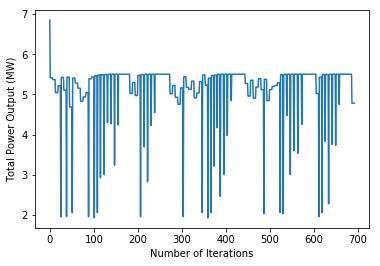

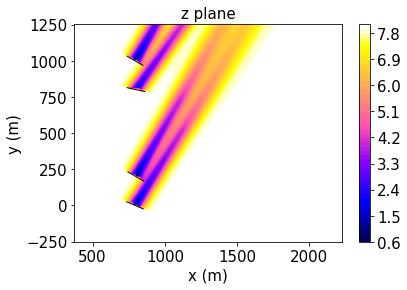

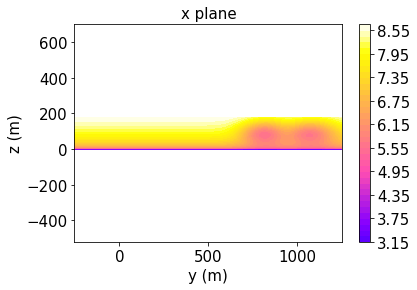

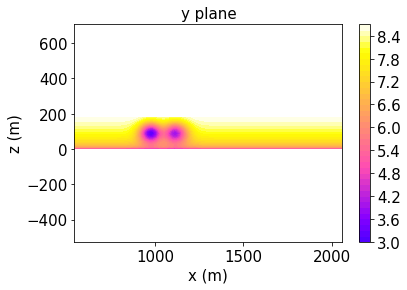

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nloc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]\nloc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]\noptimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [5]:
# set variable(s) to optimise for
imp.reload(optimisation_manager)
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-1]
maximum_values = [1]

# compute the optimal yaw angles
loc_floris.farm.flow_field.wind_direction = np.radians(300.0)
loc_yaw_opt_params, loc_yaw_opt_power, loc_yaw_data = optimisation_manager.optimise_func(loc_floris, yaw_variables, minimum_values, maximum_values, loc_yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
loc_yaw_subopt_power = loc_yaw_data[2][iteration - 1]
loc_yaw_subopt_params = loc_yaw_data[3][iteration - 1]
optimisation_manager.print_output(floris, loc_yaw_data, loc_yaw_subopt_params, init_power, loc_yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Optimise Power Output for Yaw Angle Only with Basin-Hopping

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5071359.493418431
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.10222e+06 trial_f -5.07136e+06 accepted 0  lowest_f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5091829.486294493
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.10222e+06 trial_f -5.09183e+06 accepted 0  lowest_f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current func

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5154237.012628634
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 24: f -5.3146e+06 trial_f -5.15424e+06 accepted 0  lowest_f -5.3146e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5293730.878346532
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 25: f -5.3146e+06 trial_f -5.29373e+06 accepted 0  lowest_f -5.3146e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4944101.453609118
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 26: f -5.3146e+06 trial_f -4.9441e+06 accepted 0  lowest_f -5.3146e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Cu

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5042015.853327874
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 47: f -5.3146e+06 trial_f -5.04202e+06 accepted 0  lowest_f -5.3146e+06
Optimised  Parameters:
Turbine (200.0, 200.0) parameter yaw_angle = 0.5
Turbine (200.0, 800.0) parameter yaw_angle = -0.5
Turbine (800.0, 200.0) parameter yaw_angle = 0.009842267366507007
Turbine (800.0, 800.0) parameter yaw_angle = 0.020751624289405496
Turbine (200.0, 200.0) Power Output = 1339326.5652052267 MW
Turbine (200.0, 800.0) Power Output = 1711865.0018158003 MW
Turbine (800.0, 200.0) Power Output = 1305613.5528590567 MW
Turbine (800.0, 800.0) Power Output = 685210.7240280807 MW
Initial Power Output = 5.102218332510335 MW
Optimised, Power Output = 5.314600087375041 MW
Power increased by 4.162537567462584%
Time to optimise wake = 3.4364120960235596 s


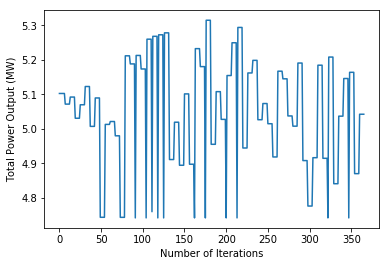

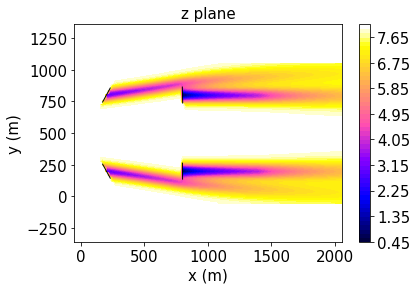

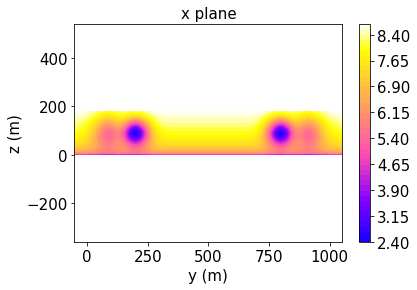

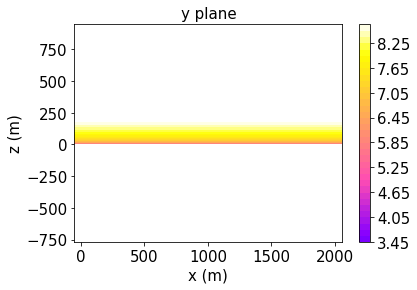

'\nnum_iterations = len(loc_data[1])\niteration = np.int(num_iterations / 2)\nyaw_subopt_power = data[2][iteration - 1]\nyaw_subopt_params = data[3][iteration - 1]\noptimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)\n'

In [6]:
# set variable(s) to optimise for
yaw_floris = Floris('{}.json'.format(case))
yaw_variables=['yaw_angle']

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-0.5]
maximum_values = [0.5]

# compute the optimal yaw angles
yaw_opt_params, yaw_opt_power, yaw_data = optimisation_manager.optimise_func(yaw_floris, yaw_variables, minimum_values, maximum_values, yaw_name, case, global_search=True)

# print output at halfway iteration
"""
num_iterations = len(loc_data[1])
iteration = np.int(num_iterations / 2)
yaw_subopt_power = data[2][iteration - 1]
yaw_subopt_params = data[3][iteration - 1]
optimisation_manager.print_output(yaw_floris, data, yaw_subopt_params, init_power, yaw_subopt_power, yaw_variables, num_turbines, is_opt=False, plot_wakes=True)
"""

## Evolution of Optimisation

Iteration #0, Total Power Output = 6.845040564803114 MW


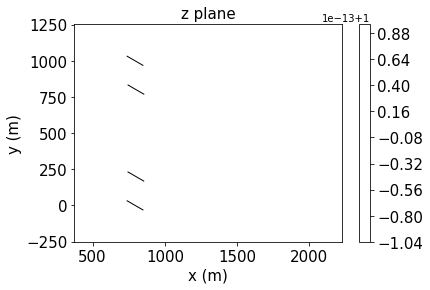

Iteration #6, Total Power Output = 5.41053014977347 MW


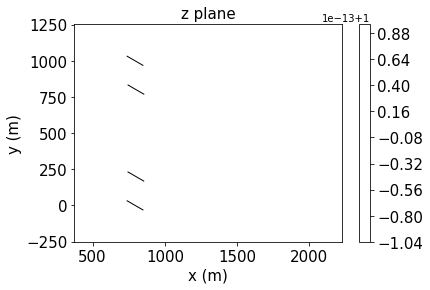

Iteration #12, Total Power Output = 5.368328942832995 MW


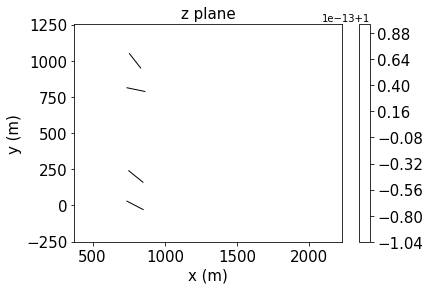

Iteration #18, Total Power Output = 5.04536671547032 MW


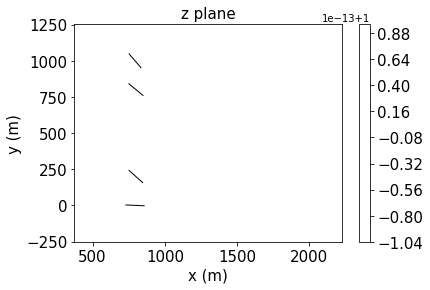

Iteration #24, Total Power Output = 5.214653780443794 MW


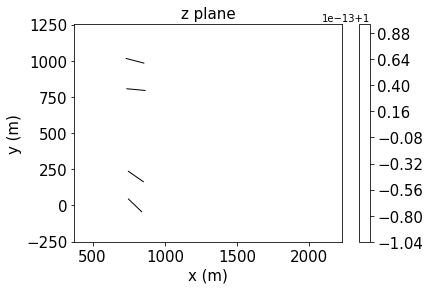

Iteration #30, Total Power Output = 5.4238118407570735 MW


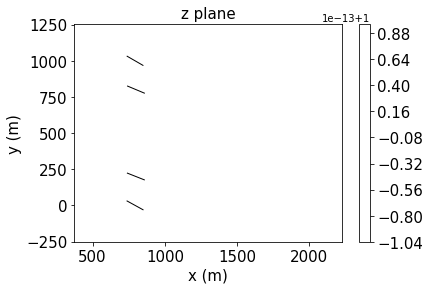

Iteration #36, Total Power Output = 5.105332809392011 MW


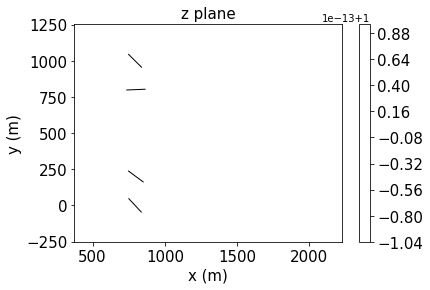

Iteration #42, Total Power Output = 5.4300025818660105 MW


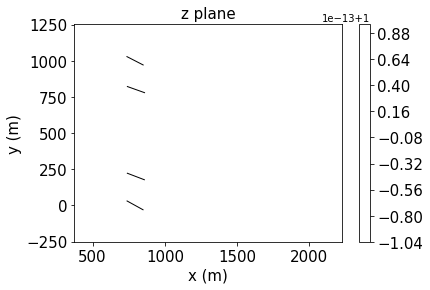

Iteration #48, Total Power Output = 4.684296827250821 MW


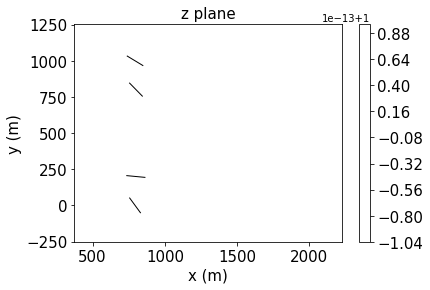

Iteration #54, Total Power Output = 5.408074365682542 MW


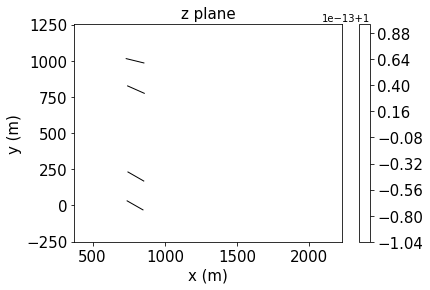

Iteration #60, Total Power Output = 5.283230079427544 MW


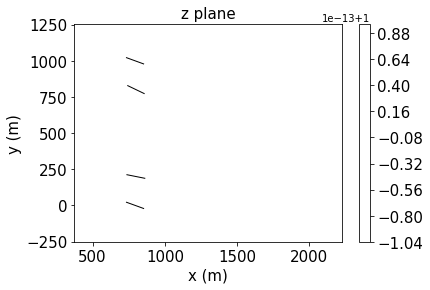

Iteration #66, Total Power Output = 5.1551727125279845 MW


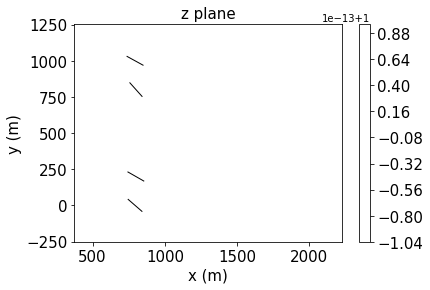

Iteration #72, Total Power Output = 4.833042830752861 MW


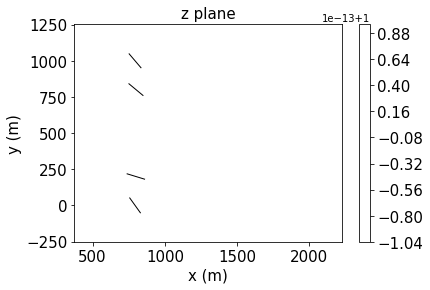

Iteration #78, Total Power Output = 4.9377772283803925 MW


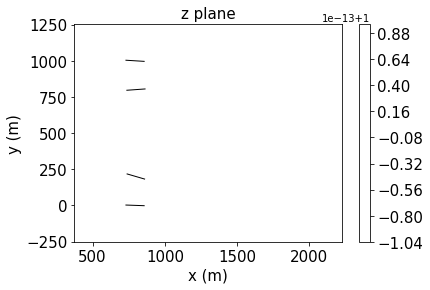

Iteration #84, Total Power Output = 5.039265995096724 MW


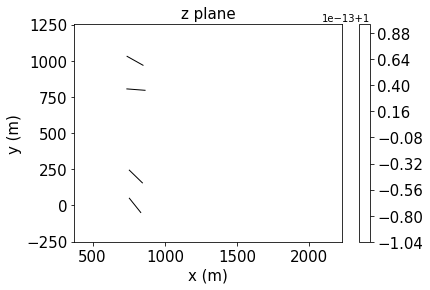

Iteration #90, Total Power Output = 5.390364272873281 MW


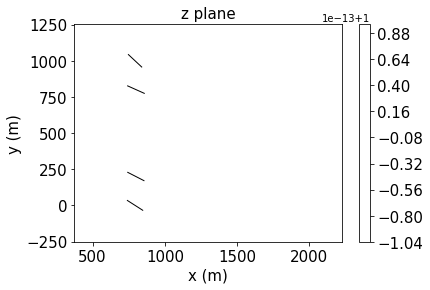

Iteration #96, Total Power Output = 5.435783525881389 MW


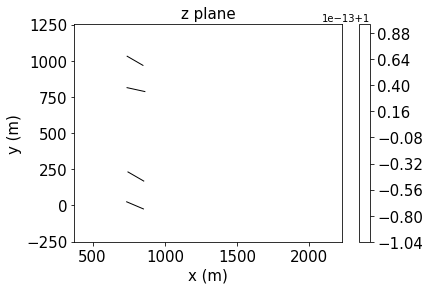

Iteration #102, Total Power Output = 5.46431613932104 MW


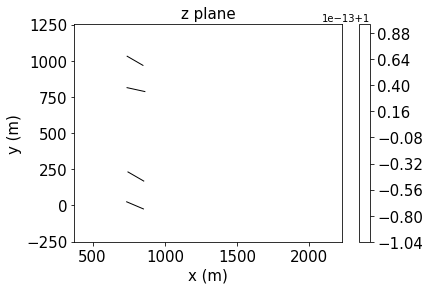

Iteration #108, Total Power Output = 2.0607749327329556 MW


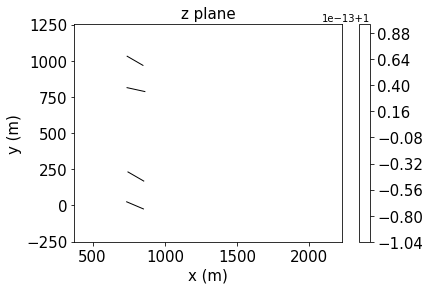

Iteration #114, Total Power Output = 5.481328351749273 MW


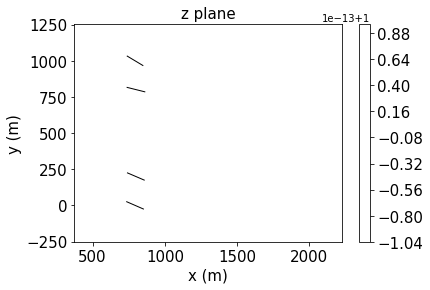

Iteration #120, Total Power Output = 5.489740083605399 MW


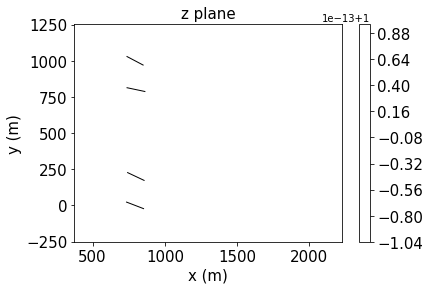

Iteration #126, Total Power Output = 5.494456773333661 MW


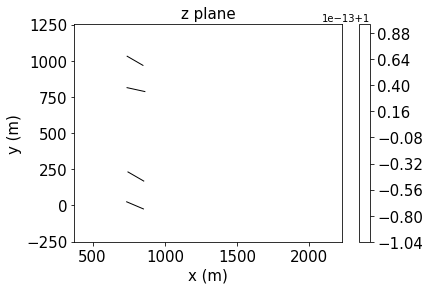

Iteration #132, Total Power Output = 5.492461206183695 MW


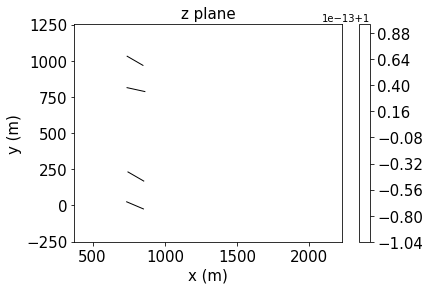

Iteration #138, Total Power Output = 5.499935009203821 MW


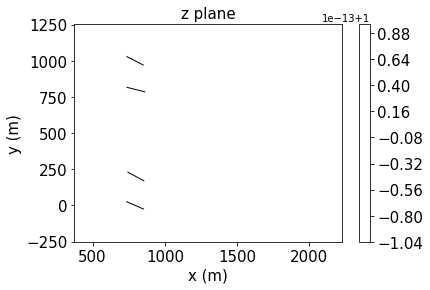

Iteration #144, Total Power Output = 5.502986516749591 MW


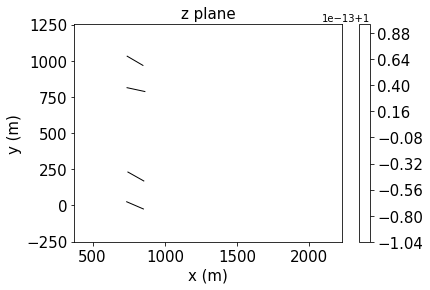

Iteration #150, Total Power Output = 5.5032027415712275 MW


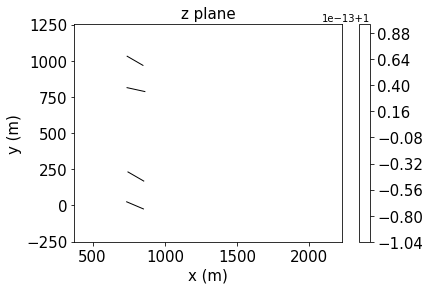

Iteration #156, Total Power Output = 5.482592898658782 MW


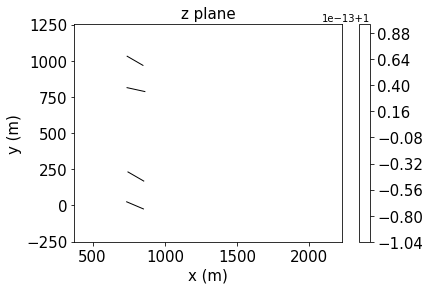

Iteration #162, Total Power Output = 5.503241689590489 MW


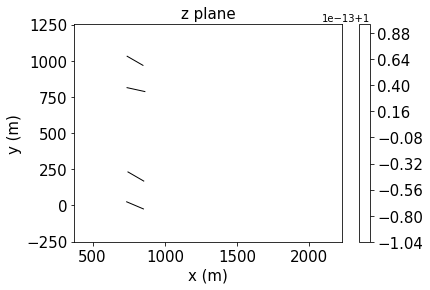

Iteration #168, Total Power Output = 5.503245215543005 MW


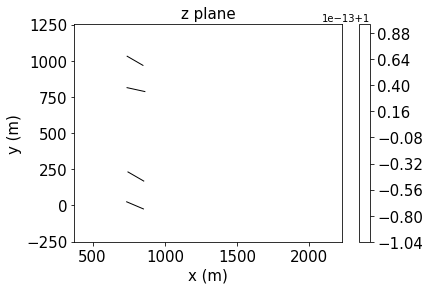

Iteration #174, Total Power Output = 5.503245245374912 MW


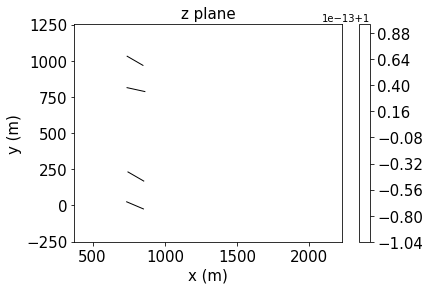

Iteration #180, Total Power Output = 5.503245245538314 MW


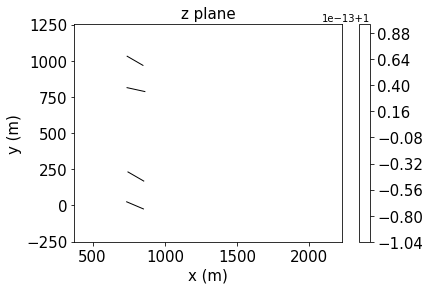

Iteration #186, Total Power Output = 5.022780057202383 MW


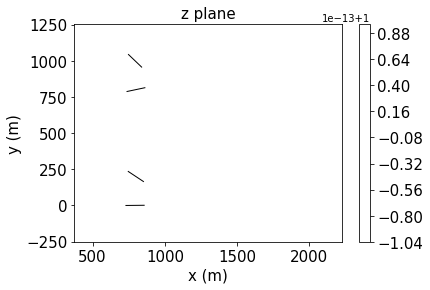

Iteration #192, Total Power Output = 5.296002736636251 MW


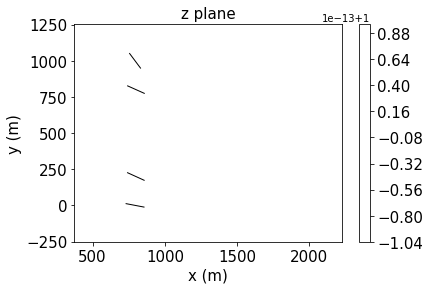

Iteration #198, Total Power Output = 4.973149745588991 MW


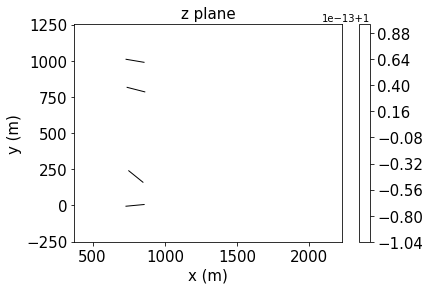

Iteration #204, Total Power Output = 5.476725259562828 MW


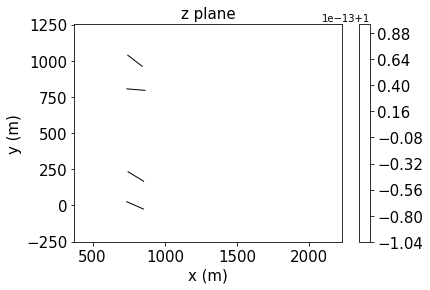

Iteration #210, Total Power Output = 5.493729105976212 MW


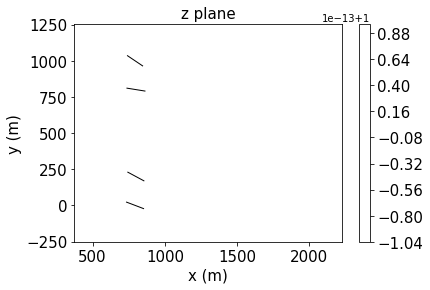

Iteration #216, Total Power Output = 5.502395622703317 MW


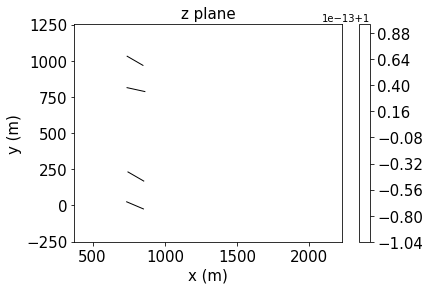

Iteration #222, Total Power Output = 2.8281205188696847 MW


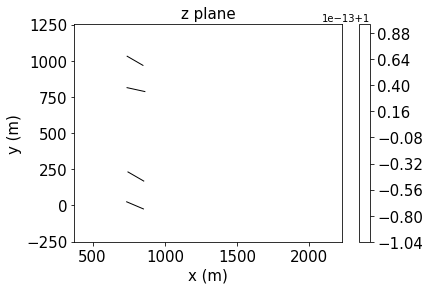

Iteration #228, Total Power Output = 5.503079359740425 MW


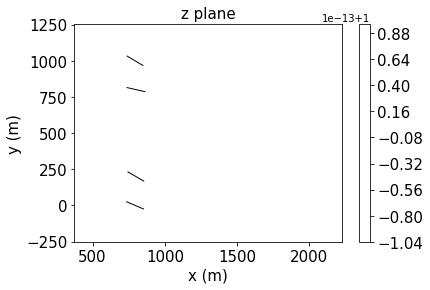

Iteration #234, Total Power Output = 5.503240596627096 MW


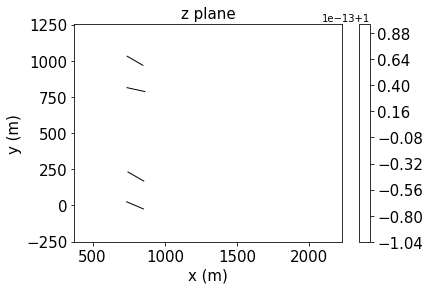

Iteration #240, Total Power Output = 5.503154480882312 MW


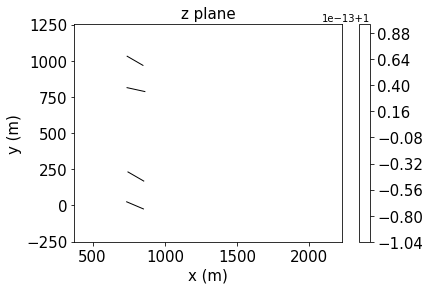

Iteration #246, Total Power Output = 5.503241540791703 MW


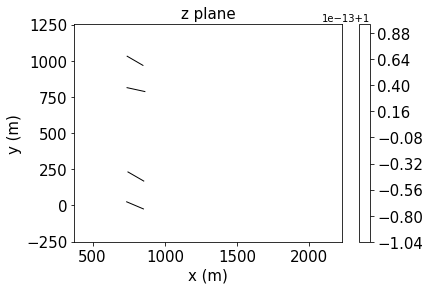

Iteration #252, Total Power Output = 5.503244224172819 MW


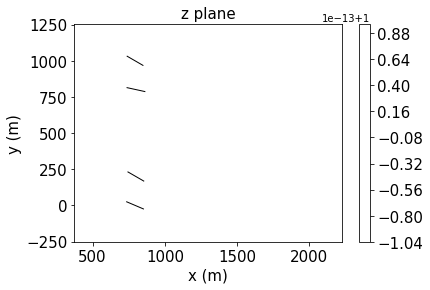

Iteration #258, Total Power Output = 5.503245000582676 MW


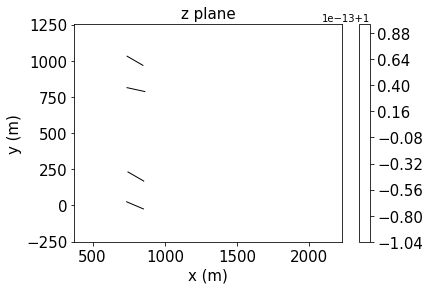

Iteration #264, Total Power Output = 5.503245241355771 MW


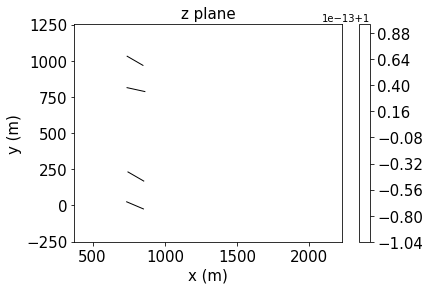

Iteration #270, Total Power Output = 5.503245245538368 MW


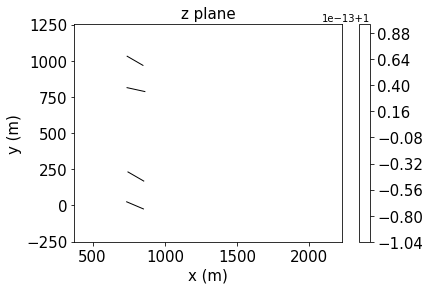

Iteration #276, Total Power Output = 5.017917593646381 MW


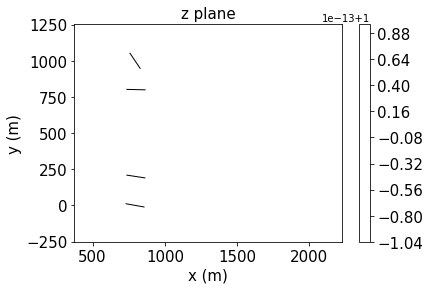

Iteration #282, Total Power Output = 5.220929685843932 MW


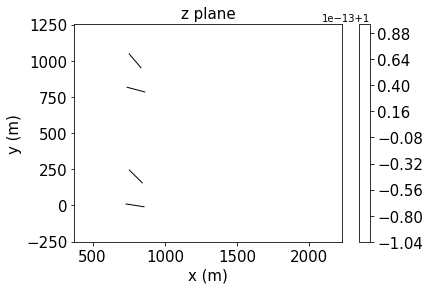

Iteration #288, Total Power Output = 4.929457423017604 MW


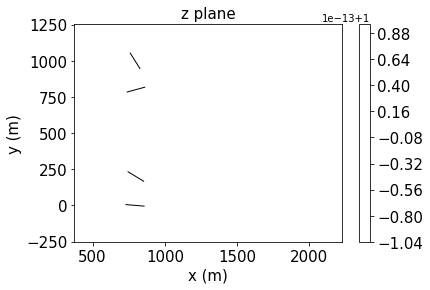

Iteration #294, Total Power Output = 4.752467213428825 MW


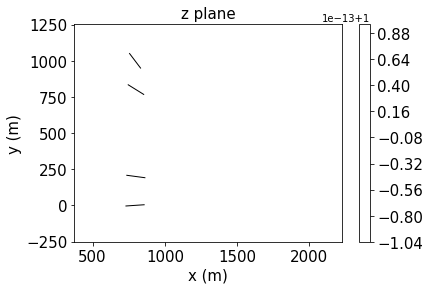

Iteration #300, Total Power Output = 5.1612345790874485 MW


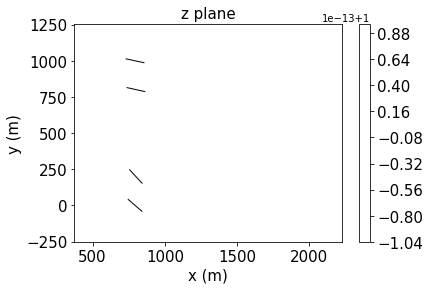

Iteration #306, Total Power Output = 5.43685941361128 MW


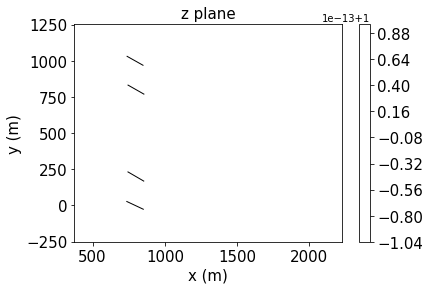

Iteration #312, Total Power Output = 5.174864600847995 MW


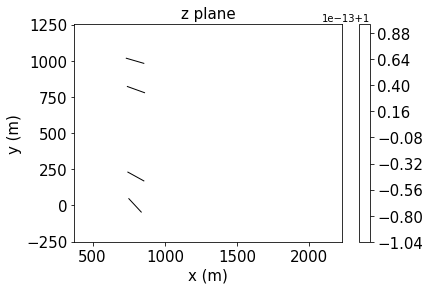

Iteration #318, Total Power Output = 5.1248582691724165 MW


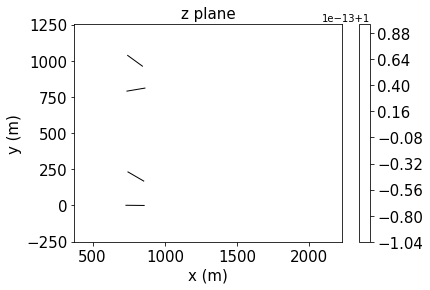

Iteration #324, Total Power Output = 5.331556113108586 MW


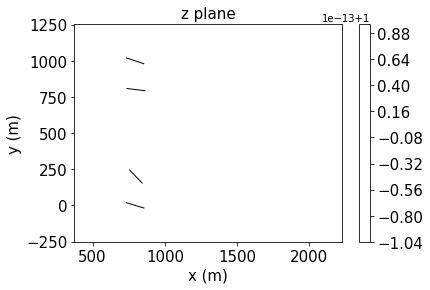

Iteration #330, Total Power Output = 4.914412046945122 MW


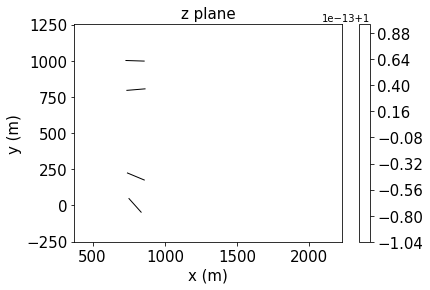

Iteration #336, Total Power Output = 5.0374736293620765 MW


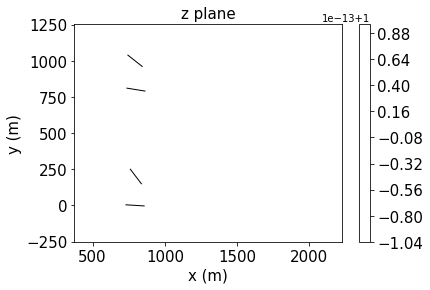

Iteration #342, Total Power Output = 5.320209528357241 MW


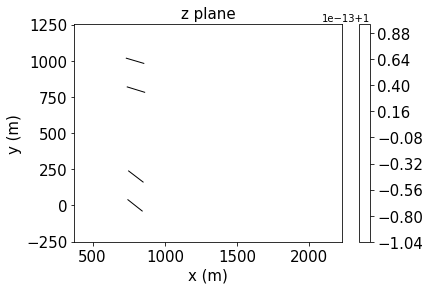

Iteration #348, Total Power Output = 5.486191972851371 MW


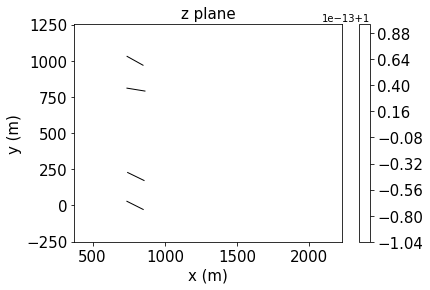

Iteration #354, Total Power Output = 5.232004358705762 MW


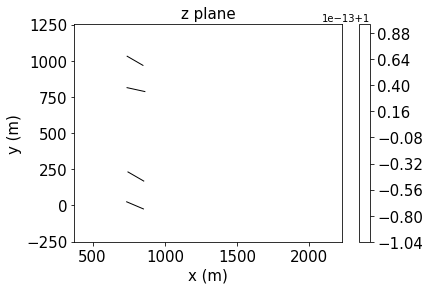

Iteration #360, Total Power Output = 5.404901926993771 MW


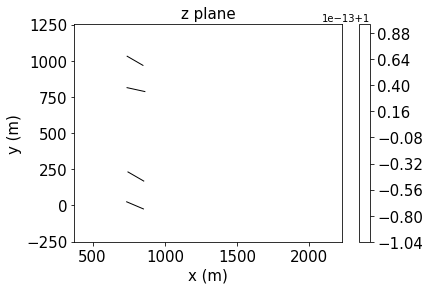

Iteration #366, Total Power Output = 2.0607748579741614 MW


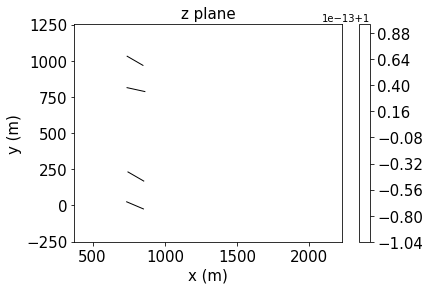

Iteration #372, Total Power Output = 5.470770642615388 MW


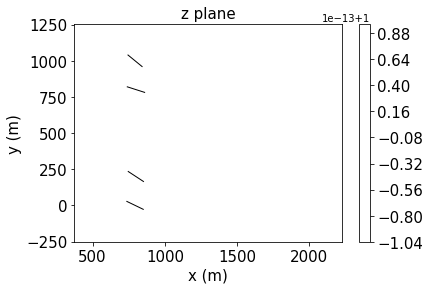

Iteration #378, Total Power Output = 5.480970414553128 MW


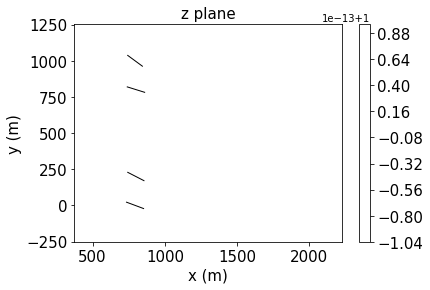

Iteration #384, Total Power Output = 5.500435043990336 MW


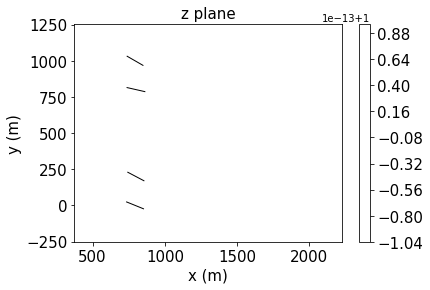

Iteration #390, Total Power Output = 5.501873261276061 MW


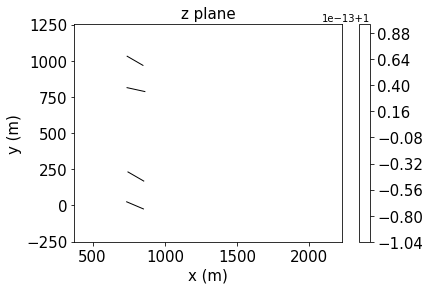

Iteration #396, Total Power Output = 5.48551787220911 MW


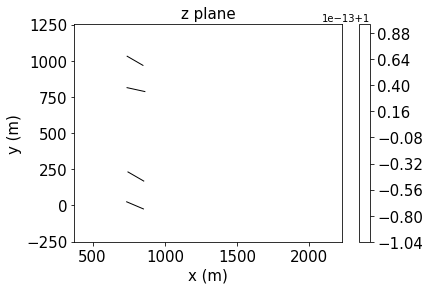

Iteration #402, Total Power Output = 5.502972206727414 MW


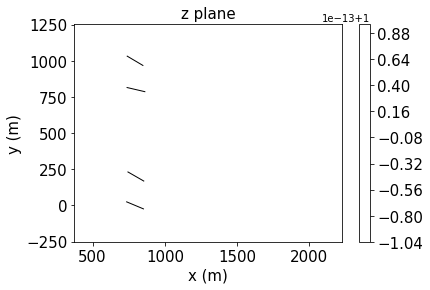

Iteration #408, Total Power Output = 5.502980533802228 MW


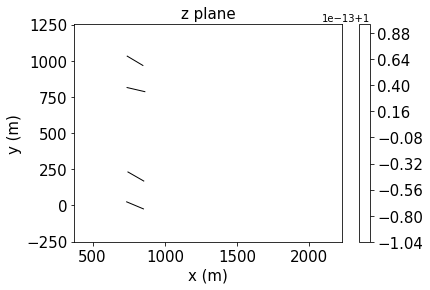

Iteration #414, Total Power Output = 5.503209895934777 MW


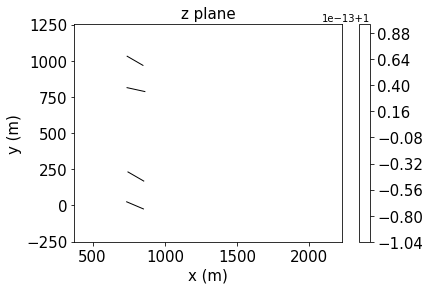

Iteration #420, Total Power Output = 5.503231466196803 MW


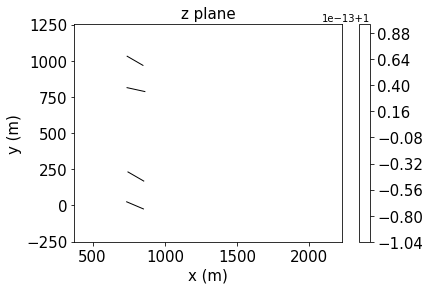

Iteration #426, Total Power Output = 5.503245168275296 MW


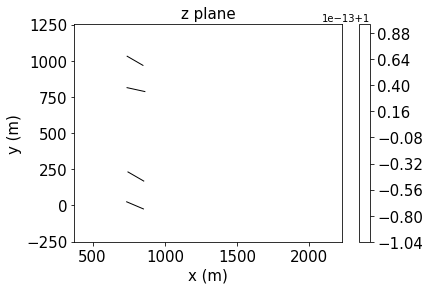

Iteration #432, Total Power Output = 5.503245244420427 MW


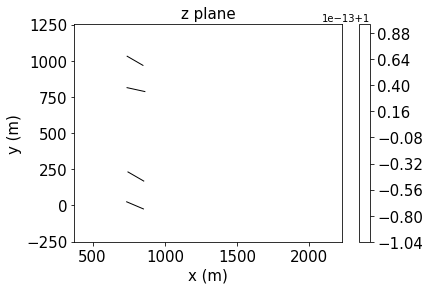

Iteration #438, Total Power Output = 5.503245245538223 MW


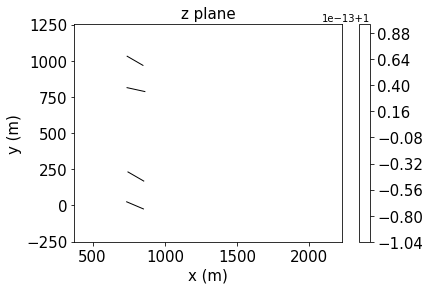

Iteration #444, Total Power Output = 5.2735614221203395 MW


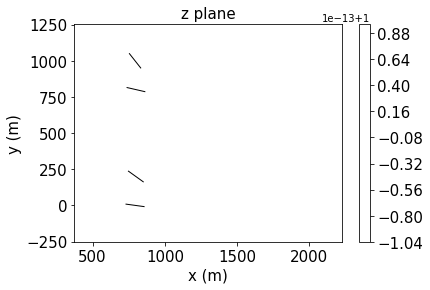

Iteration #450, Total Power Output = 4.958623305508443 MW


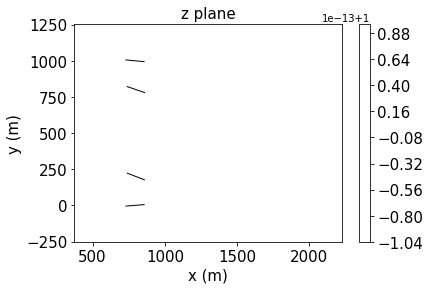

Iteration #456, Total Power Output = 5.352210084384872 MW


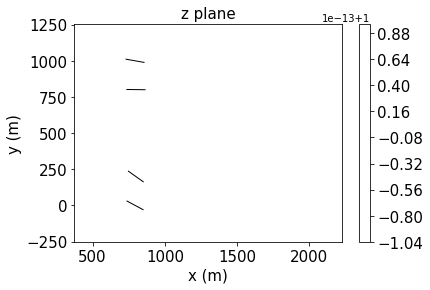

Iteration #462, Total Power Output = 4.903022653593519 MW


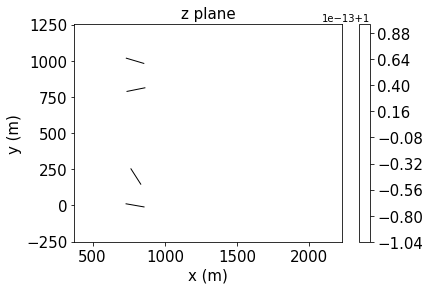

Iteration #468, Total Power Output = 5.182951719489846 MW


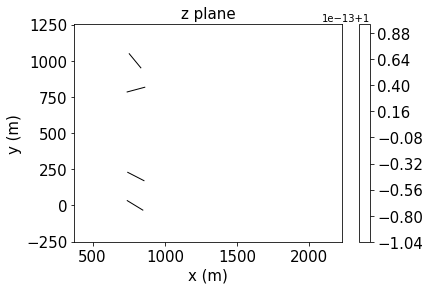

Iteration #474, Total Power Output = 5.39141290192718 MW


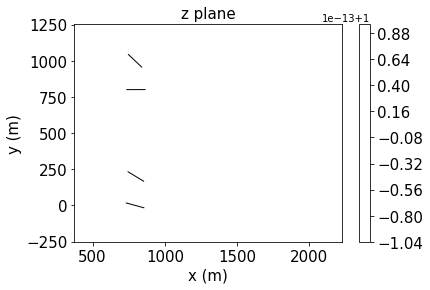

Iteration #480, Total Power Output = 5.118117569622481 MW


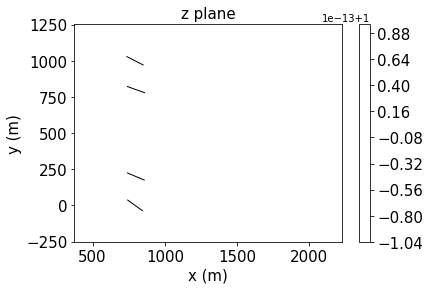

Iteration #486, Total Power Output = 2.0308263053407023 MW


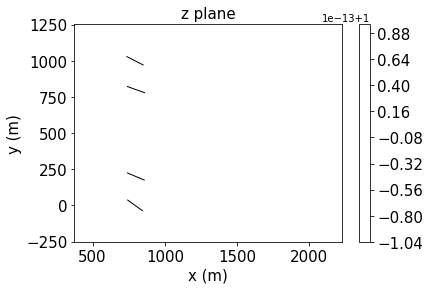

Iteration #492, Total Power Output = 5.375225799271837 MW


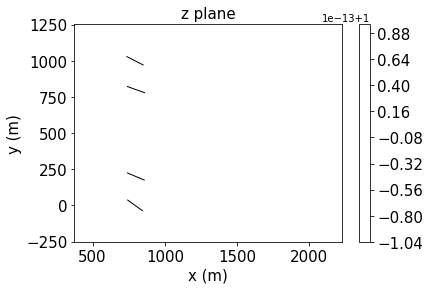

Iteration #498, Total Power Output = 4.8454152878192245 MW


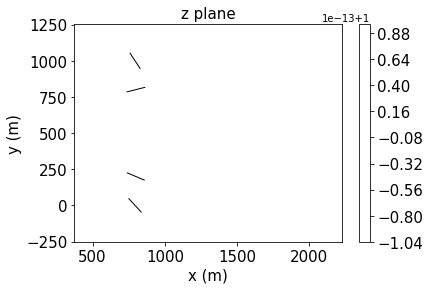

Iteration #504, Total Power Output = 5.119757887904672 MW


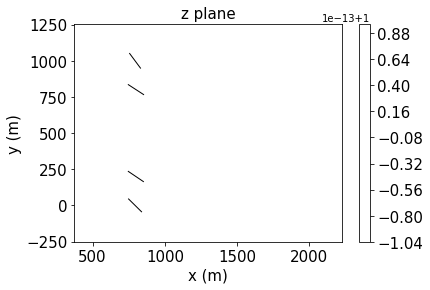

Iteration #510, Total Power Output = 5.198089657572693 MW


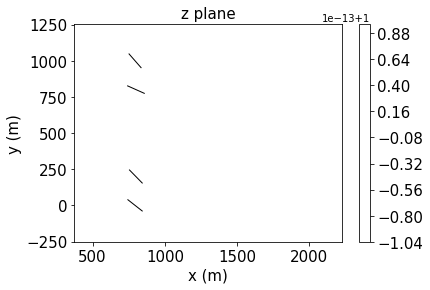

Iteration #516, Total Power Output = 5.221792991051952 MW


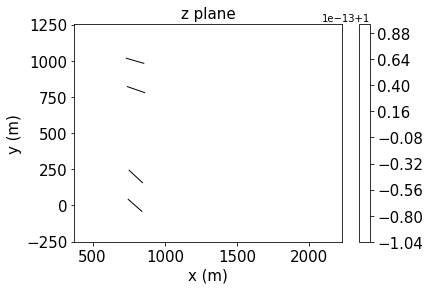

Iteration #522, Total Power Output = 5.2944002241101185 MW


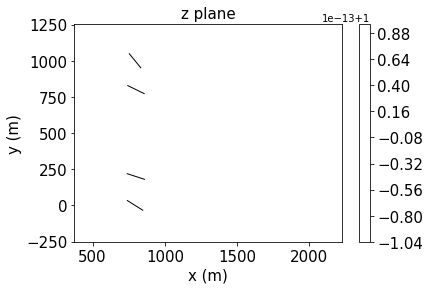

Iteration #528, Total Power Output = 5.489438623136104 MW


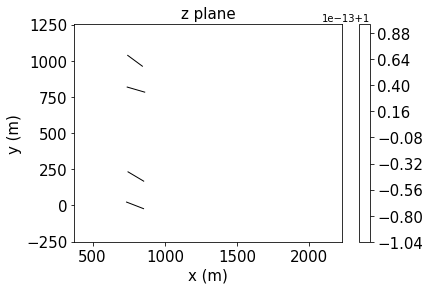

Iteration #534, Total Power Output = 5.498108786977404 MW


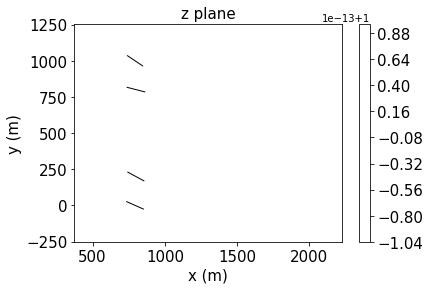

Iteration #540, Total Power Output = 5.501529842848098 MW


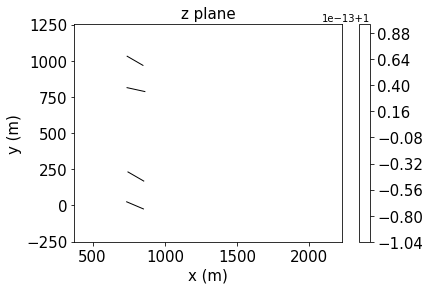

Iteration #546, Total Power Output = 3.0044219313473923 MW


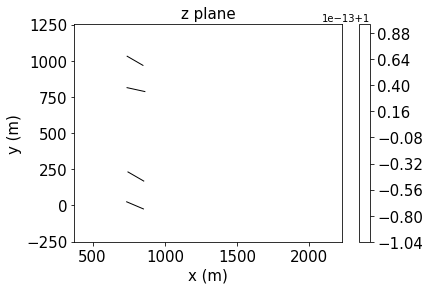

Iteration #552, Total Power Output = 5.503146223566201 MW


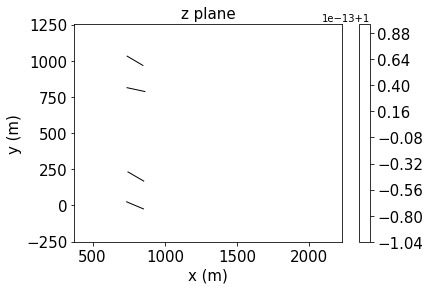

Iteration #558, Total Power Output = 5.503220229349161 MW


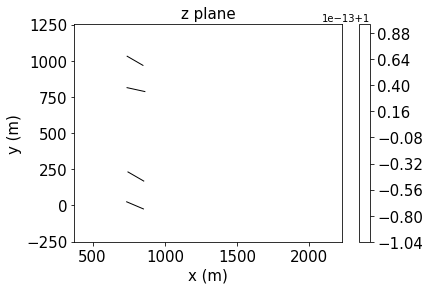

Iteration #564, Total Power Output = 5.475079431063661 MW


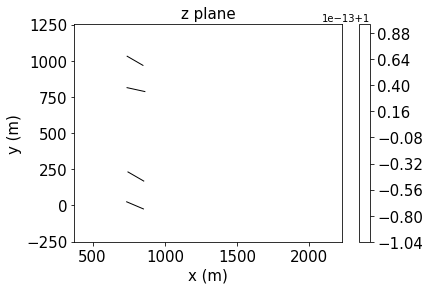

Iteration #570, Total Power Output = 5.503232176448792 MW


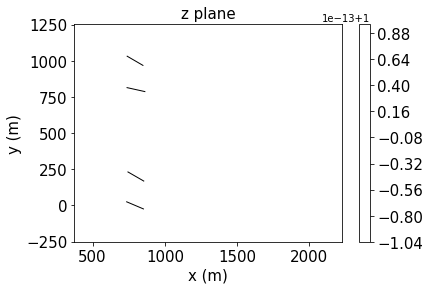

Iteration #576, Total Power Output = 5.503244668960217 MW


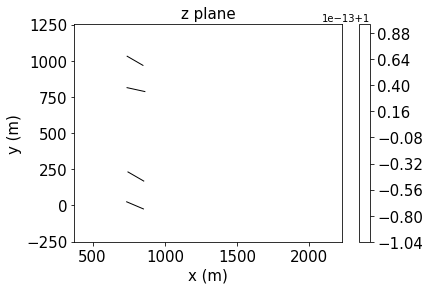

Iteration #582, Total Power Output = 5.50324518936856 MW


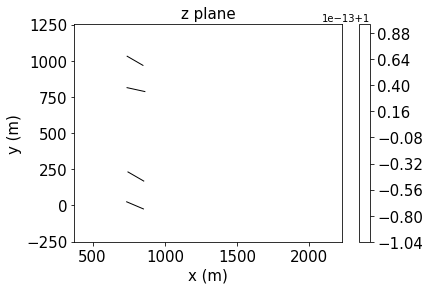

Iteration #588, Total Power Output = 5.503245244708222 MW


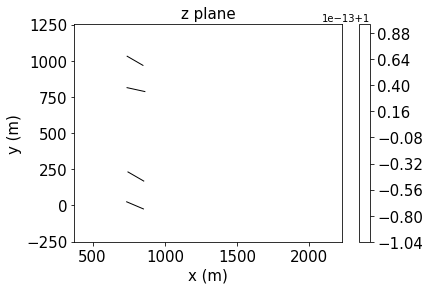

Iteration #594, Total Power Output = 5.503245245508932 MW


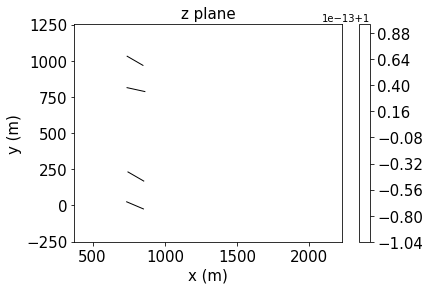

Iteration #600, Total Power Output = 5.503245245538332 MW


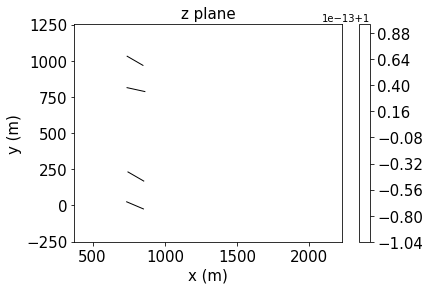

Iteration #606, Total Power Output = 5.024513573465013 MW


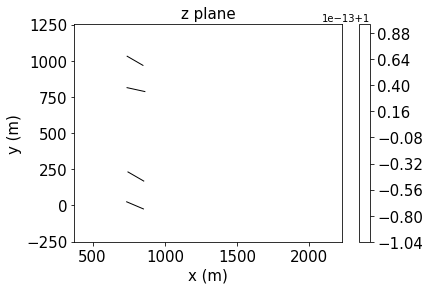

Iteration #612, Total Power Output = 5.428925892832429 MW


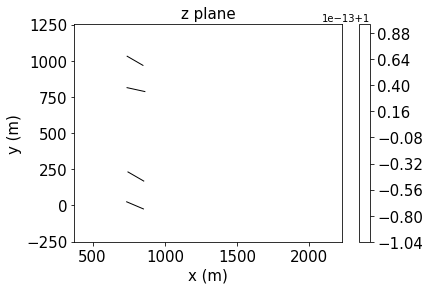

Iteration #618, Total Power Output = 2.0607748579741614 MW


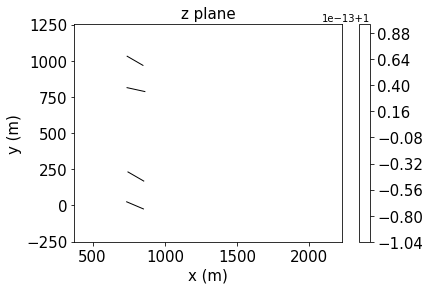

Iteration #624, Total Power Output = 5.496128488894552 MW


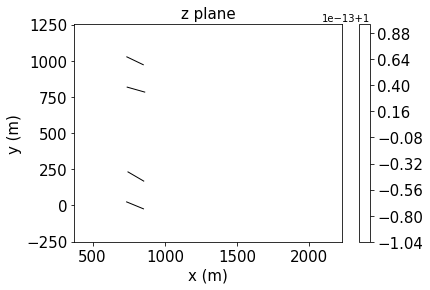

Iteration #630, Total Power Output = 5.496308319564482 MW


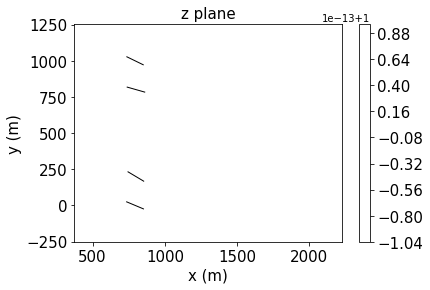

Iteration #636, Total Power Output = 5.499947486369574 MW


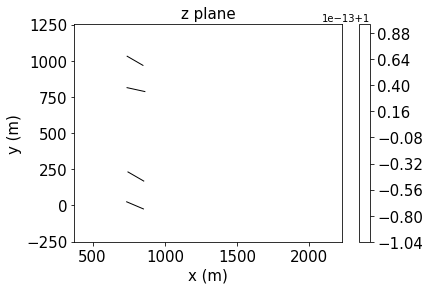

Iteration #642, Total Power Output = 5.497047980291723 MW


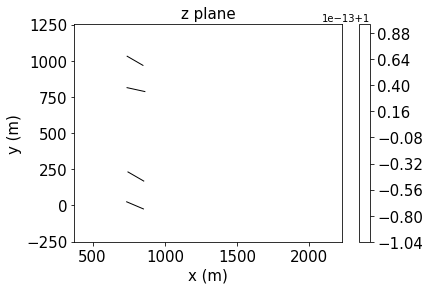

Iteration #648, Total Power Output = 5.503047756841567 MW


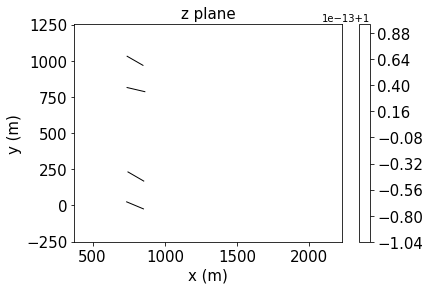

Iteration #654, Total Power Output = 5.503177475440894 MW


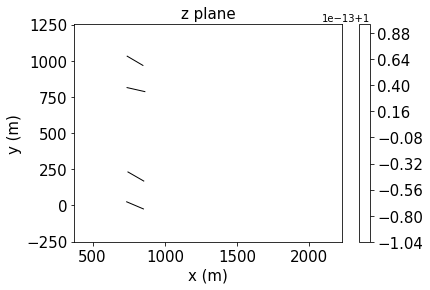

Iteration #660, Total Power Output = 5.5032423576006515 MW


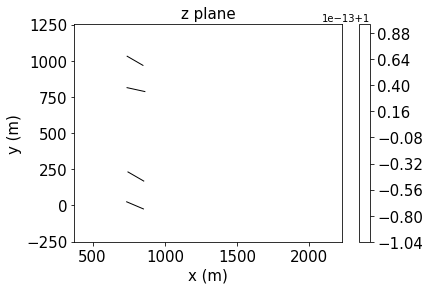

Iteration #666, Total Power Output = 5.5031850797058715 MW


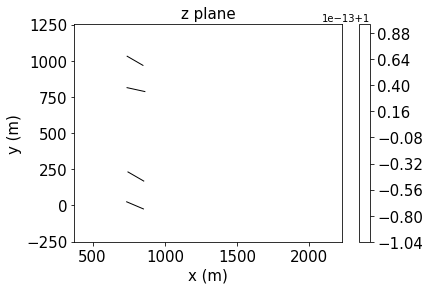

Iteration #672, Total Power Output = 5.503242471115725 MW


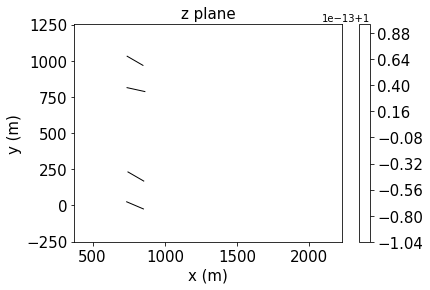

Iteration #678, Total Power Output = 5.503245205942683 MW


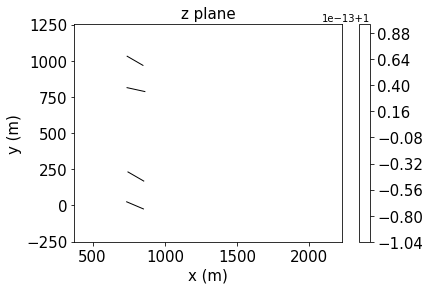

Iteration #684, Total Power Output = 5.503245245537724 MW


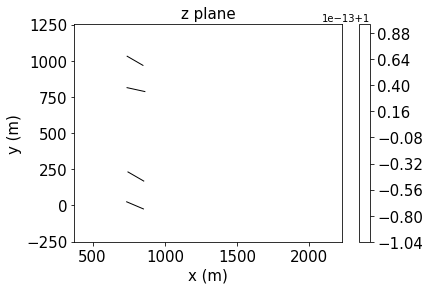

Iteration #690, Total Power Output = 4.783613080913913 MW


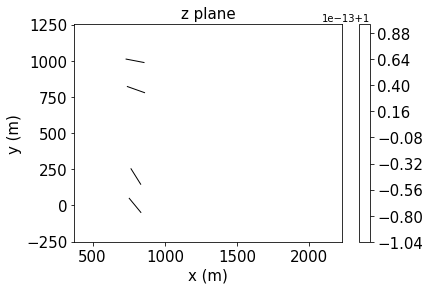

In [7]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# print evolution of optimised turbine locations

evolution_name = loc_yaw_name
evolution_data = loc_yaw_data
evolution_variables = yaw_variables
num_plots = 100

optimisation_manager.print_evolution(loc_floris, evolution_name, evolution_data, evolution_variables, num_plots)


## Wake vs Flow Direction

../imperial_floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


Power Output at 185.0 degree Flow Direction = 0.07014308137026438 MW


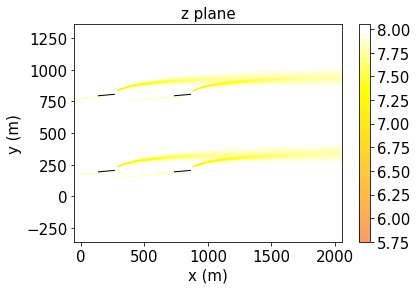

Power Output at 195.0 degree Flow Direction = 0.5428267719617309 MW


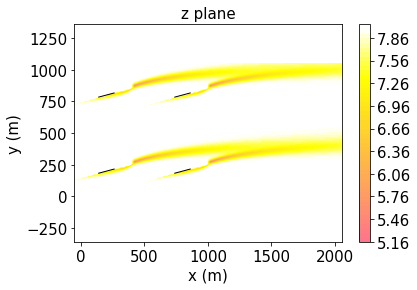

Power Output at 205.0 degree Flow Direction = 1.3646176616616177 MW


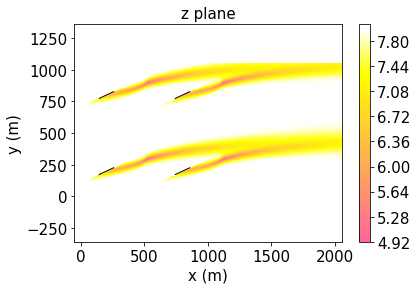

Power Output at 215.0 degree Flow Direction = 2.4230879423395506 MW


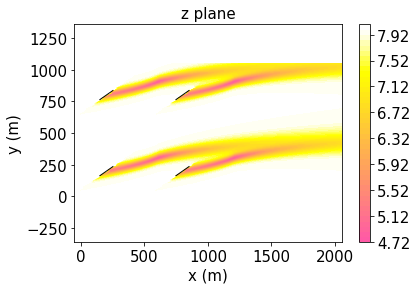

Power Output at 225.0 degree Flow Direction = 3.587832816424236 MW


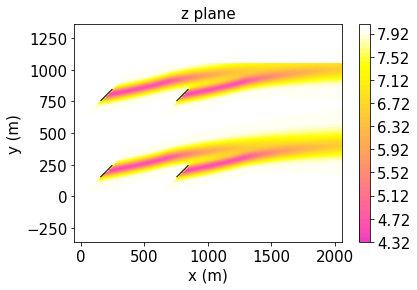

Power Output at 235.0 degree Flow Direction = 4.670751685672154 MW


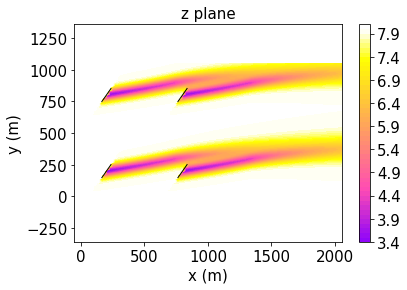

Power Output at 245.0 degree Flow Direction = 5.268126327796782 MW


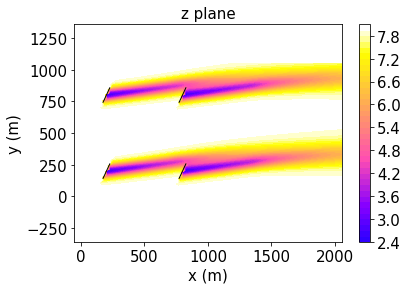

Power Output at 255.0 degree Flow Direction = 5.013262796277975 MW


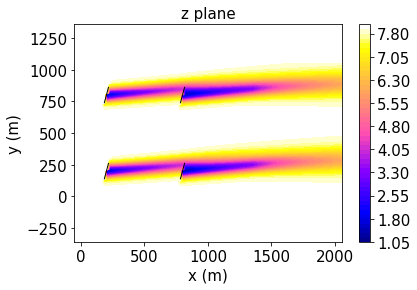

Power Output at 265.0 degree Flow Direction = 4.498591244341967 MW


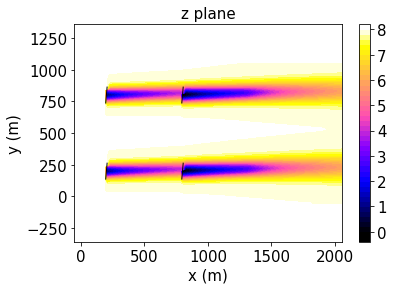

Power Output at 275.0 degree Flow Direction = 4.498591244341968 MW


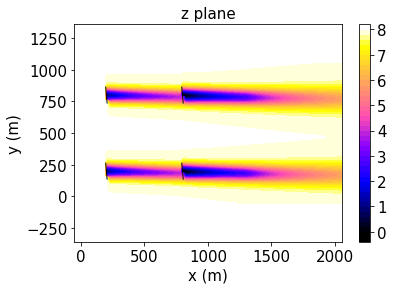

Power Output at 285.0 degree Flow Direction = 5.01326279627798 MW


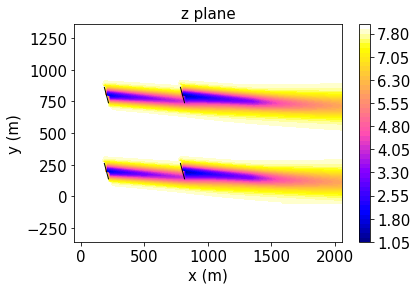

Power Output at 295.0 degree Flow Direction = 5.268126327796785 MW


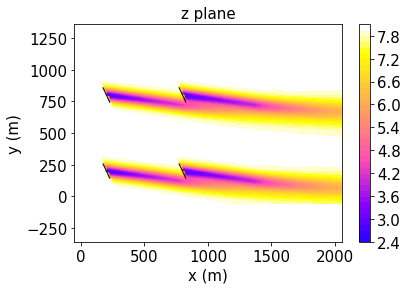

Power Output at 305.0 degree Flow Direction = 4.670751685672155 MW


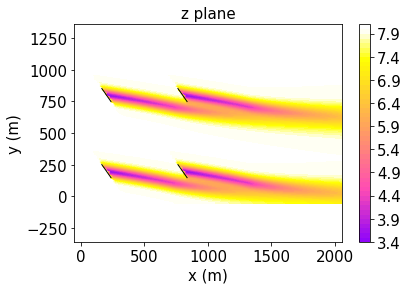

Power Output at 315.0 degree Flow Direction = 3.587832816424235 MW


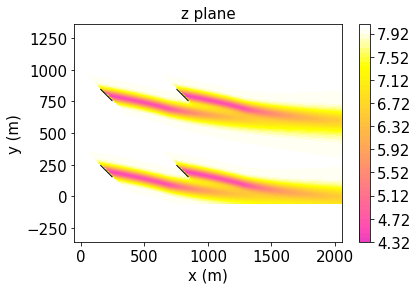

Power Output at 325.0 degree Flow Direction = 2.42308794233955 MW


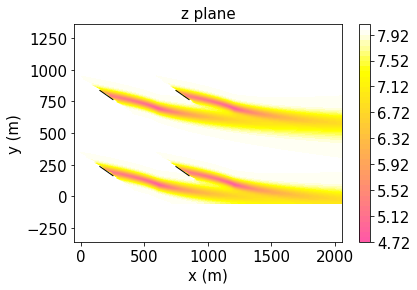

Power Output at 335.0 degree Flow Direction = 1.3646176616616177 MW


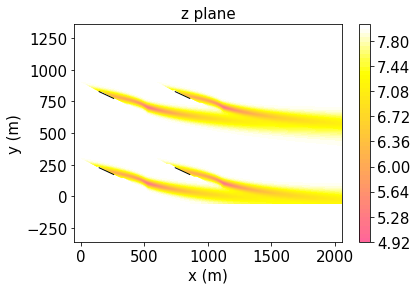

Power Output at 345.0 degree Flow Direction = 0.5428267719617309 MW


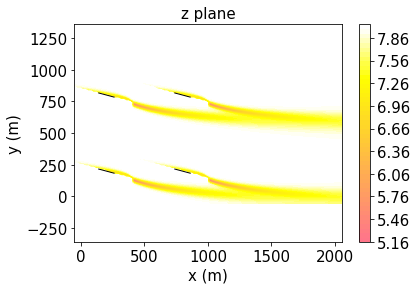

Text(0,0.5,'Power Output (MW)')

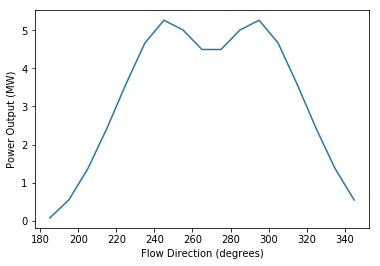

In [9]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
direction_floris = Floris('{}.json'.format(case))
direction_name = '{}_direction'.format(case)

turbines = [turbine for _, turbine in direction_floris.farm.flow_field.turbine_map.items()]
num_turbines = len(turbines)
angles = []
power = []

for d in range(-85, 85, 10):
    #direction_floris.farm.flow_field.wind_direction = np.float(d)
    optimisation_manager.set_turbine_attr_vec(np.repeat(range(num_turbines), 1), np.repeat(turbines, 1), \
                     np.repeat(range(1), num_turbines, axis=0), np.repeat(['yaw_angle'], num_turbines, axis=0), \
                     np.ones(num_turbines) * np.radians(d), num_turbines)
    direction_floris.farm.flow_field.calculate_wake()
    flow_field_viz = direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, direction_name, plot_wakes=True)
    power.append(optimisation_manager.calc_power(direction_floris)[1] / 10**6)
    angles.append(270.0 + d)
    print('Power Output at {} degree Flow Direction = {} MW'.format(angles[-1], power[-1]))
    visualization_manager.plot_z_planes([0.5])
    
fig, ax = plt.subplots()
ax.plot(angles, power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')

## Optimise Yaw Angle for Different Wind Directions

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5196605.782657294
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.19661e+06 trial_f -5.19661e+06 accepted 1  lowest_f -5.19661e+06
found new global minimum on step 1 with function value -5.19661e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4850018.8749880325
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.19661e+06 trial_f -4.85002e+06 accepted 0  lowest_f -5.19661e+06
Positive directiona

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5032077.952529947
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 23: f -5.32299e+06 trial_f -5.03208e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4901202.3537147865
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.32299e+06 trial_f -4.9012e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4406045.089119
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 25: f -5.32299e+06 trial_f -4.40605e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5125555.539726846
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 46: f -5.32299e+06 trial_f -5.12556e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4970866.717573362
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 47: f -5.32299e+06 trial_f -4.97087e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5025478.512501689
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 48: f -5.32299e+06 trial_f -5.02548e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

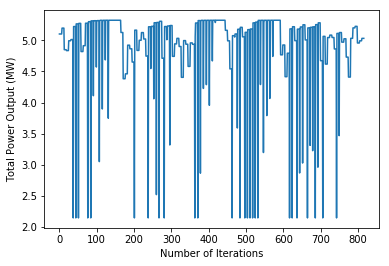

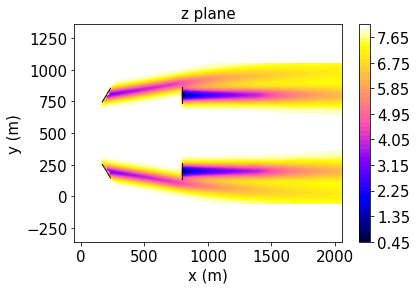

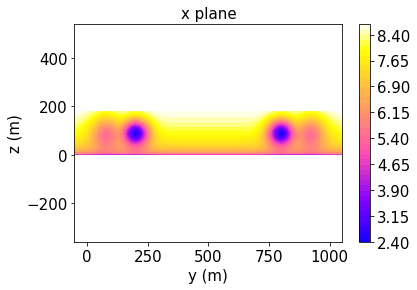

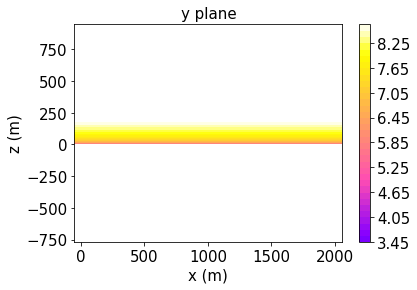

Optimizing...
Number of parameters to optimize =  4
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4698820.7648317255
            Iterations: 6
            Function evaluations: 12
            Gradient evaluations: 2
basinhopping step 0: f -4.69882e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5725389.407587529
            Iterations: 8
            Function evaluations: 28
            Gradient evaluations: 4
basinhopping step 1: f -5.72539e+06 trial_f -5.72539e+06 accepted 1  lowest_f -5.72539e+06
found new global minimum on step 1 with function value -5.72539e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5203107.038930515
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 2: f -5.72539e+06 trial_f -5.20311e+06 accepted 0  lowest_f -5.72539e+06
Positiv

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5700296.983636577
            Iterations: 7
            Function evaluations: 22
            Gradient evaluations: 3
basinhopping step 23: f -5.72539e+06 trial_f -5.7003e+06 accepted 0  lowest_f -5.72539e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4608285.286490273
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.72539e+06 trial_f -4.60829e+06 accepted 0  lowest_f -5.72539e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5609000.091345476
            Iterations: 7
            Function evaluations: 20
            Gradient evaluations: 3
basinhopping step 25: f -5.72539e+06 trial_f -5.609e+06 accepted 0  lowest_f -5.72539e+06
Positive directional derivative for linesearch    (Exit mode 8)
          

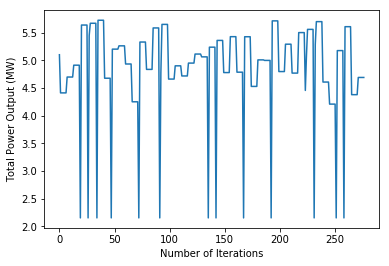

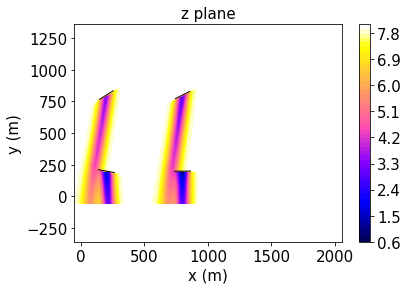

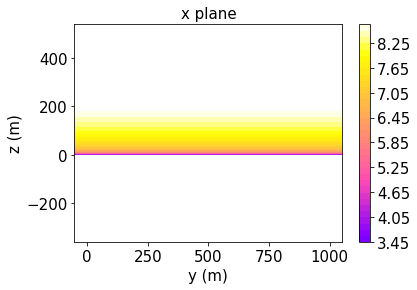

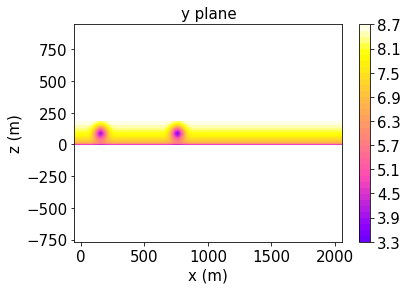

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5102218.332510335
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 0: f -5.10222e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5067403.569617199
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 1: f -5.10222e+06 trial_f -5.0674e+06 accepted 0  lowest_f -5.10222e+06


../imperial_floris/wake_velocity.py:226: RuntimeWarning: invalid value encountered in sqrt
  velDef = (U_local*(1-np.sqrt(1-((Ct*np.cos(yaw))/(8.0*sigma_y*sigma_z/D**2)) ) )*totGauss)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5322992.512403887
            Iterations: 21
            Function evaluations: 134
            Gradient evaluations: 18
basinhopping step 2: f -5.32299e+06 trial_f -5.32299e+06 accepted 1  lowest_f -5.32299e+06
found new global minimum on step 2 with function value -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5134828.13178916
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 3: f -5.32299e+06 trial_f -5.13483e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5186838.250868484
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 4: f -5.32299e+06 trial_f -5.18684e+06 accepted 0  lowest_f -5.32299e+06
Positive dire

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5248804.153978085
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 25: f -5.32299e+06 trial_f -5.2488e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5200470.997818324
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 26: f -5.32299e+06 trial_f -5.20047e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5303681.317079264
            Iterations: 8
            Function evaluations: 27
            Gradient evaluations: 4
basinhopping step 27: f -5.32299e+06 trial_f -5.30368e+06 accepted 0  lowest_f -5.32299e+06
Positive directional derivative for linesearch    (Exit mode 8)
        

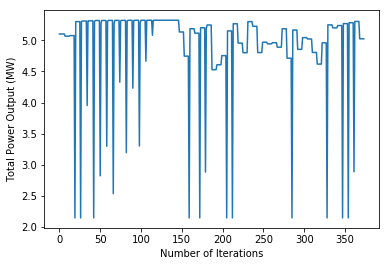

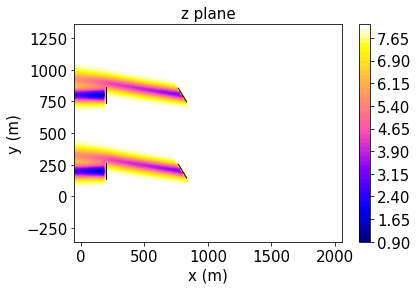

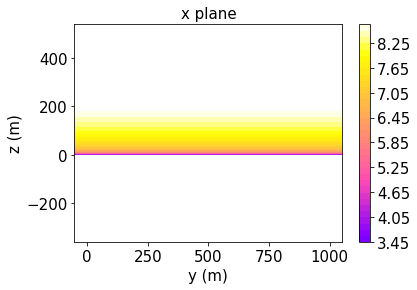

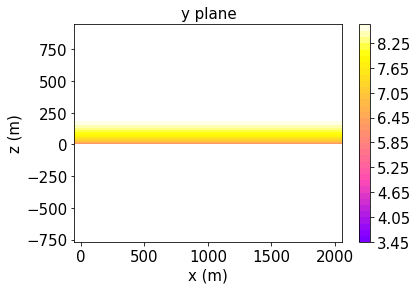

Optimizing...
Number of parameters to optimize =  4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5798199.549733526
            Iterations: 14
            Function evaluations: 93
            Gradient evaluations: 13
basinhopping step 0: f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5518941.36341076
            Iterations: 6
            Function evaluations: 14
            Gradient evaluations: 2
basinhopping step 1: f -5.7982e+06 trial_f -5.51894e+06 accepted 0  lowest_f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4889558.719137305
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 2: f -5.7982e+06 trial_f -4.88956e+06 accepted 0  lowest_f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current functi

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5702770.490863227
            Iterations: 7
            Function evaluations: 22
            Gradient evaluations: 3
basinhopping step 23: f -5.7982e+06 trial_f -5.70277e+06 accepted 0  lowest_f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -4629526.948847988
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1
basinhopping step 24: f -5.7982e+06 trial_f -4.62953e+06 accepted 0  lowest_f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -5739179.8086818345
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
basinhopping step 25: f -5.7982e+06 trial_f -5.73918e+06 accepted 0  lowest_f -5.7982e+06
Positive directional derivative for linesearch    (Exit mode 8)
            

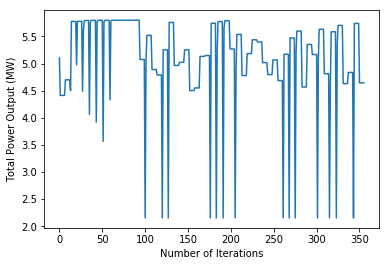

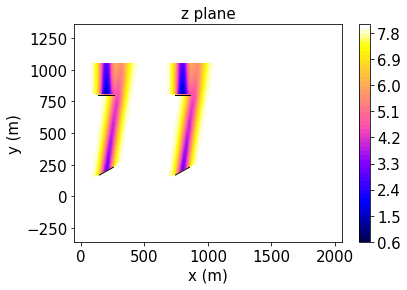

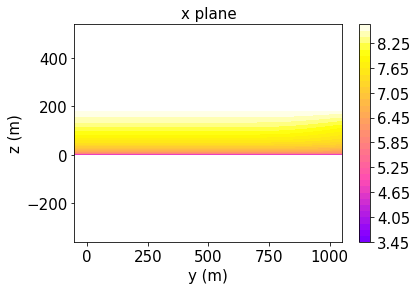

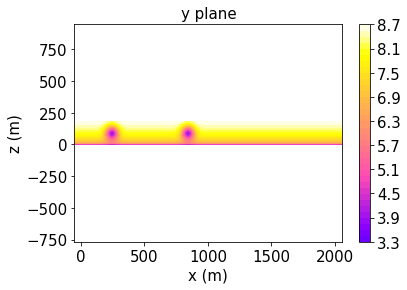

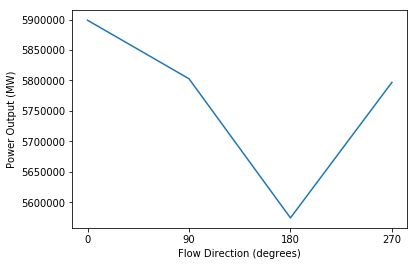

In [14]:
# reload optimisation_manager if edited
imp.reload(optimisation_manager)

# initialise floris objec tand file name
yaw_direction_name = '{}_yaw_direction'.format(case)

# set bounds for the optimization on the turbine parameters (radians for angles)
minimum_values = [-1]
maximum_values = [1]

angles = [0.0, 90.0, 180.0, 270.0]
power = []

for a in range(len(angles)):
    yaw_direction_floris = Floris('{}.json'.format(case))
    yaw_direction_floris.farm.flow_field.wind_direction = np.radians(angles[a])
    #yaw_direction_floris.farm.flow_field.calculate_wake()
    # compute the optimal yaw angles
    yaw_direction_opt_params, yaw_direction_opt_power, yaw_direction_data = optimisation_manager.optimise_func(yaw_direction_floris, yaw_variables, minimum_values, maximum_values, yaw_direction_name, case, global_search=True)

    flow_field_viz = yaw_direction_floris.farm.flow_field
    visualization_manager = VisualizationManager(flow_field_viz, yaw_direction_name, plot_wakes=True)
    power_output = optimisation_manager.calc_power(yaw_direction_floris)
    power.append(power_output[1])
    
fig, ax = plt.subplots()
ax.plot(270.0 - np.asarray(angles), power)
ax.set_xlabel('Flow Direction (degrees)')
ax.set_ylabel('Power Output (MW)')
ax.set_xticks(angles)